In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('dados.csv')

In [3]:
dados = dados[len(dados)-10:]

In [4]:
y_train = dados['Confirmados'][:7].values.ravel()

In [5]:
x_train = np.asarray(range(len(y_train)))

In [6]:
y_test = dados['Confirmados'][7:].values.ravel()

In [7]:
x_test = np.asarray(range(len(y_train),len(y_train)+3)).reshape(-1,1)

In [8]:
y_train.shape,x_train.shape

((7,), (7,))

In [9]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [10]:
x_train = x_train.reshape(-1,1)

In [11]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))

In [12]:
reg.fit(x_train, y_train)

C:\Users\patri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\patri\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [13]:
pred = reg.predict(x_test)

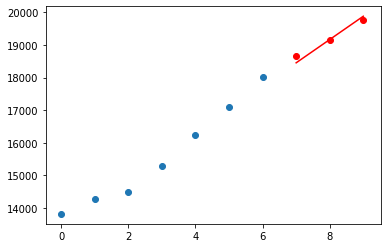

In [14]:
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test,color='r')
plt.plot(x_test,pred,color='r')
plt.show()

In [15]:
pred = pred.reshape(-1,1)

In [16]:
pred

array([[18451.52243005],
       [19166.23782744],
       [19880.95322484]])

In [17]:
y_test

array([[18665],
       [19158],
       [19753]], dtype=int64)

In [18]:
dif = pred - y_test

In [19]:
dif

array([[-213.47756995],
       [   8.23782744],
       [ 127.95322484]])

In [20]:
import warnings
warnings.simplefilter("ignore")

# função

In [21]:
def predict(x,y,n_pred=3):
    
    #Recebe os ultimos 7 dias, e faz a predição para 3 dias seguintes.
    #shape esperado das entradas:
    #shape X e y:((7,), (7,))
    #shape resultante: (3,)
    #tipo de dados: numpy.ndarray
    
    reg = make_pipeline(StandardScaler(),
                        SGDRegressor(max_iter=10000, tol=1e-3))
    reg.fit(x, y)
    
    n_max = int(x.max())
    x = np.asarray(range(n_max,n_max+n_pred)).reshape(-1,1)
    
    return np.int_(np.around(reg.predict(x)))

In [22]:
predict(x_train,y_train)

array([17737, 18452, 19167])

In [23]:
var = np.zeros((1000,3))
for i in range(1000):
        var[i] = (predict(x_train,y_train))

In [24]:
np.std(var[:,0]),np.std(var[:,1]),np.std(var[:,2])

(0.45570933718764206, 0.31776563690871296, 0.38634699429398955)

In [25]:
np.mean(var[:,0]),np.mean(var[:,1]),np.mean(var[:,2])

(17737.177, 18451.955, 19166.856)

https://coronavirus.ufpi.edu.br/noticias-e-atualizacoes/sala-de-situa%C3%A7%C3%A3o/sala-de-situa%C3%A7%C3%A3o-0806
Material sobre os indicadores, regiões de saude e predição
